<a href="https://colab.research.google.com/github/Saakshi23/ALL-THE-EXPERIMENT/blob/main/NLP_EX_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
import random
random.shuffle(documents)

In [4]:
# 1. Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocesses text data: tokenization, lowercasing, removing stopwords, and lemmatization."""
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document
preprocessed_documents = [(preprocess_text(' '.join(words)), category) for words, category in documents]

In [5]:
# 2. Analysis
# Count positive and negative reviews
positive_reviews_count = sum(1 for _, category in preprocessed_documents if category == 'pos')
negative_reviews_count = sum(1 for _, category in preprocessed_documents if category == 'neg')

# Print analysis results
print("Number of positive reviews:", positive_reviews_count)
print("Number of negative reviews:", negative_reviews_count)

Number of positive reviews: 1000
Number of negative reviews: 1000


In [6]:
# 3. Classification of sentiment
# Feature extraction
X = [doc[0] for doc in preprocessed_documents]
y = [doc[1] for doc in preprocessed_documents]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

# Predictions
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8075


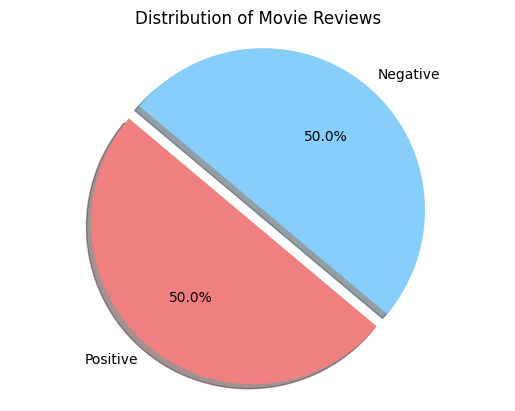

In [7]:
# 4. Visualization
# Plot the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Movie Reviews')
plt.show()